### Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

%matplotlib inline 

### Project Backgroud

Cookie Cats is a hugely popular mobile puzzle game developed by Tactile Entertainment. It's a classic "connect three"-style puzzle game where the player must connect tiles of the same color to clear the board and win the level.(From DataCamp)
![title](backgroud_img.png)

### App monetization

As players progress through the game, they would encounter gates that ask them to wait some amount of time to enter the next game or make purchases to avoid waiting. As a result, the timing of placing gates is an important decision to make.

### Task

Currently, the first gate was at level 30. The company wants to know the effect of the first gate at level 30 and level 40. Would the change affect player retention?

### Dataset Description

The dataset is from Kaggle. https://www.kaggle.com/yufengsui/mobile-games-ab-testing

### Data Description

The data is from 90,189 players that installed the game while the AB-test was running. The variables are:

- `userid` - a unique number for each player.
- `version` - whether the player was put in the control group
- `sum_gamerounds` - the number of game rounds played by the player during the first week after installation
- `retention_1` - did the player come back and play 1 day after installing?
- `retention_7` - did the player come back and play 7 days after installing?

### Process
1. Understand the dataset
2. Check if there are any missing value and outliner
3. EDA and data visualization
4. Hypothesis testing - are we confident about the difference?
5. Result and business recommendation

## Understand the dataset

In [2]:
df = pd.read_csv('cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [4]:
df.isna().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [5]:
df.shape

(90189, 5)

## Let's explore the data

In [6]:
# basic statistic of sum_gamerounds
df["sum_gamerounds"].agg(["count", "median", "mean", "std", "max"]).T

count     90189.000000
median       16.000000
mean         51.872457
std         195.050858
max       49854.000000
Name: sum_gamerounds, dtype: float64

In [7]:
#basic stat for target variable
df.groupby("version").sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
version,,,,,
gate_30,44700,17,52.456264,256.716423,49854
gate_40,45489,16,51.298776,103.294416,2640


Based on the table, I can see that gate 30 is more dispersed, and max sum_gamerounds is much higher than gate_40.

In [8]:
#remove outliner for distribtion charts
tmp = df[df.sum_gamerounds < 49854]

Text(0.5, 1.0, 'Gate 40')

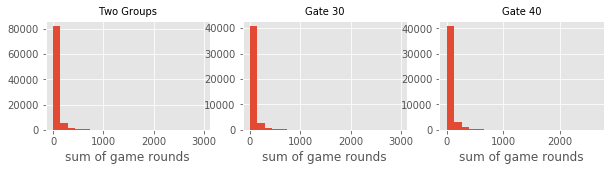

In [39]:
fig, axes = plt.subplots(1, 3, figsize = (10,2))
tmp.sum_gamerounds.hist(ax = axes[0],bins=20)
tmp[tmp.version=='gate_30'].sum_gamerounds.hist(ax = axes[1],bins=20)
tmp[tmp.version=='gate_40'].sum_gamerounds.hist(ax = axes[2],bins=20)

axes[0].set_title("Two Groups", fontsize = 10)
axes[0].set(xlabel="sum of game rounds")
axes[1].set(xlabel="sum of game rounds")
axes[2].set(xlabel="sum of game rounds")
axes[1].set_title("Gate 30", fontsize = 10)
axes[2].set_title("Gate 40", fontsize = 10)

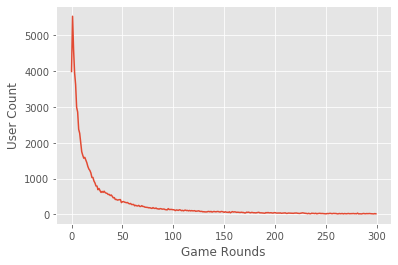

In [10]:
#distribtion of user for sum game round

game_count = tmp.groupby('sum_gamerounds')['userid'].count()
ax = game_count.head(n=300).plot(x="sum_gamerounds", y="userid")
ax.set_xlabel("Game Rounds")
ax.set_ylabel("User Count");

In [11]:
tmp.groupby("sum_gamerounds").userid.count().head(5)

sum_gamerounds
0    3994
1    5538
2    4606
3    3958
4    3629
Name: userid, dtype: int64

There are around 4000 users downloaded the app but neverplay the game.

In [12]:
tmp.groupby(["version", "retention_1"]).sum_gamerounds.agg(["count", "median", "mean", "max"])

count  median       mean   max
version retention_1                                
gate_30 False        24665       6  16.359092  1072
        True         20034      48  94.411700  2961
gate_40 False        25370       6  16.340402  1241
        True         20119      49  95.381182  2640

In [13]:
tmp.groupby(["version", "retention_7"]).sum_gamerounds.agg(["count", "median", "mean", "max"])

count  median        mean   max
version retention_7                                 
gate_30 False        36198      11   25.796508   981
        True          8501     105  160.117516  2961
gate_40 False        37210      11   25.856356  2640
        True          8279     111  165.649837  2294

### overall rentention rate for day1 and day7

In [14]:
rentation_1_rate = df['retention_1'].sum() / df['retention_1'].count()
rentation_1_rate = '{:.1%}'.format(rentation_1_rate)
print('Rentation day 1 rate: {}'.format(rentation_1_rate))

Rentation day 1 rate: 44.5%


In [15]:
rentation_7_rate = df['retention_7'].sum() / df['retention_7'].count()
rentation_7_rate = '{:.1%}'.format(rentation_7_rate)
print('Rentation day 7 rate: {}'.format(rentation_7_rate))

Rentation day 7 rate: 18.6%


In [16]:
###Gate 30 and gate 40 day1 and day 7 retention rate

In [44]:
df.groupby('version')['retention_1'].sum() / df.groupby('version')['retention_1'].count().to_frame(30).T

version,gate_30,gate_40
30,0.448188,0.442283


In [45]:
df.groupby('version')['retention_7'].sum() / df.groupby('version')['retention_7'].count().to_frame(40).T

version,gate_30,gate_40
40,0.190201,0.182


In [49]:
pd.DataFrame({"Day1_ratio": df.groupby('version')['retention_1'].sum() / df.groupby('version')['retention_1'].count(),
              "Day7_ratio": df.groupby('version')['retention_7'].sum() / df.groupby('version')['retention_7'].count()})

,Day1_ratio,Day7_ratio
version,,
gate_30,0.448188,0.190201
gate_40,0.442283,0.182000


For gate 30, both day1 and day7 retention rate are slighly higher than gate 40. Let's do hypothesis test to check if it is a difference or just random error.

## AB testing

Perform AB testing to see if there is a difference between two version.

Hypothesis

- H0: There is no difference between gate 30 and gate 40 version.
- H1: There is a difference between two version.

Use rentation mean as test statistic.

### Bootstrapping

In [19]:
#bootstrap function

def bootstrap_rep_1d(data, func):
    bs_sample = np.random.choice(data,len(data))
    return func(bs_sample)

def bs_reps(data, func, size=1):
    bs_rep = np.empty(size)
    for i in range(size):
        bs_rep[i] = bootstrap_rep_1d(data, func)
        
    return bs_rep

### Estimate the difference of the rentention rate between two groups and report a 95% confidence interval

#### Day1

In [20]:
gate_30_ren_1 = df[df['version']=='gate_30']['retention_1']
gate_40_ren_1 = df[df['version']=='gate_40']['retention_1']

In [21]:
mean_diff = gate_30_ren_1.mean() - gate_40_ren_1.mean()

#get boostrap replicates of mean
bs_rep_30 = bs_reps(gate_30_ren_1,np.mean,10000)
bs_rep_40 = bs_reps(gate_40_ren_1,np.mean,10000)

bs_diff_rep = bs_rep_30 - bs_rep_40

conf_int = np.percentile(bs_diff_rep,[2.5, 97.5])

print('difference of means=', '{:.1%}'.format(mean_diff))
print('95% confidence interval=',conf_int)

difference of means= 0.6%
95% confidence interval= [-0.00057896  0.01241318]


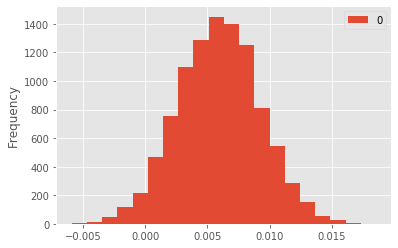

In [22]:
boot_1d = pd.DataFrame(bs_diff_rep)
ax = boot_1d.plot.hist(bins=20)

In [23]:
### probability of difference
prob = (bs_diff_rep > 0).sum() / len(bs_diff_rep)
prob = '{:.1%}'.format(prob)
print('probability of difference day1',prob)

probability of difference day1 96.5%


#### Day7

In [24]:
gate_30_ren_7 = df[df['version']=='gate_30']['retention_7']
gate_40_ren_7 = df[df['version']=='gate_40']['retention_7']

In [25]:
mean_diff = gate_30_ren_7.mean() - gate_40_ren_7.mean()

#get boostrap replicates of mean
bs_rep_30_7 = bs_reps(gate_30_ren_7,np.mean,10000)
bs_rep_40_7 = bs_reps(gate_40_ren_7,np.mean,10000)

bs_diff_rep = bs_rep_30_7 - bs_rep_40_7

conf_int = np.percentile(bs_diff_rep,[2.5, 97.5])

print('difference of means=', '{:.1%}'.format(mean_diff))
print('95% confidence interval=',conf_int)

difference of means= 0.8%
95% confidence interval= [0.00309795 0.0132196 ]


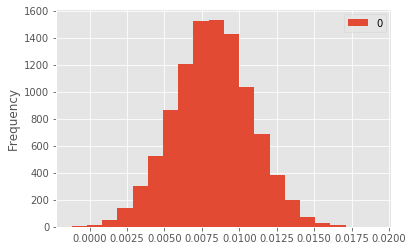

In [26]:
boot_1d = pd.DataFrame(bs_diff_rep)
ax = boot_1d.plot.hist(bins=20)

In [27]:
### probability of difference
prob = (bs_diff_rep > 0).sum() / len(bs_diff_rep)
prob = '{:.1%}'.format(prob)
print('probability of difference day7',prob)

probability of difference day7 99.9%


### Bootstrap hypothesis test

#### Day1

In [28]:
mean_all = df['retention_1'].mean()

#generate shifted 
force_30_shifted_1 = gate_30_ren_1 - gate_30_ren_1.mean() + mean_all
force_40_shifted_1 = gate_40_ren_1 - gate_40_ren_1.mean() + mean_all

#1000 bootstrap rep for shifted col
bs_rep_30 = bs_reps(force_30_shifted_1, np.mean,size=10000)
bs_rep_40 = bs_reps(force_40_shifted_1, np.mean,size=10000)

bs_rep = bs_rep_30 - bs_rep_40

p = np.sum(bs_rep>= mean_diff) / len(bs_rep)
print('p-value',p)

p-value 0.0065


p-value is smaller than 0.05 -> reject null hypothesis

#### Day7

In [29]:
mean_all = df['retention_1'].mean()

#generate shifted 
force_30_shifted_7 = gate_30_ren_7 - gate_30_ren_7.mean() + mean_all
force_40_shifted_7 = gate_40_ren_7 - gate_40_ren_7.mean() + mean_all

#1000 bootstrap rep for shifted col
bs_rep_30_7 = bs_reps(force_30_shifted_1, np.mean,size=10000)
bs_rep_40_7 = bs_reps(force_40_shifted_1, np.mean,size=10000)

bs_rep = bs_rep_30_7 - bs_rep_40_7

p = np.sum(bs_rep>= mean_diff) / len(bs_rep)
print('p-value',p)

p-value 0.0069


p-value is smaller than 0.05 -> reject null hypothesis

In [30]:
#refresh rentention rate
df.groupby('version')['retention_1'].sum() / df.groupby('version')['retention_1'].count(), df.groupby('version')['retention_7'].sum() / df.groupby('version')['retention_7'].count()

(version
 gate_30    0.448188
 gate_40    0.442283
 Name: retention_1, dtype: float64,
 version
 gate_30    0.190201
 gate_40    0.182000
 Name: retention_7, dtype: float64)

## Result

Based on the result of the hypothesis test, there is a significant difference between the two groups.
The retention rate for gate 30 is higher than gate 40 for both day one and day seven. 
The result tells that we can confidently believe that day one and day seven retention rate of version gate 30 is higher than the version of gate 40.
In short, the company should not change the gate level to 40.

### Findings and Recommendation

- The company should not move to gate 40 since 7-day retention is higher when the gate is at level 30.
- The retention rate drops from 44% to 18% within six days. The company should figure a way to maintain their player based. It might be players get bored at day3 or day4 and decide to leave the game. To improve the retention rate for the first week, the company can provide some incentives such as free gifts are add interesting challenges, etc.